In [52]:
#沿用上一次作业的代码
#生成训练数据的函数
import numpy as np
def get_data(num,expect,variation):
    m=np.array(expect)
    s=np.array(variation)
    raw=np.random.multivariate_normal(m,s,num)
    return raw
def get_dataset(num,expect1,variation1,expect2,variation2):
    raw=get_data(num,expect1,variation1)
    labels=np.ones((num,1))
    final_data=np.concatenate([raw,labels],axis=1)
    raw_1=get_data(num,expect2,variation2)
    neg_labels=-np.ones((num,1))
    final_data_1=np.concatenate([raw_1,neg_labels],axis=1)
    dataset=np.concatenate([final_data,final_data_1],axis=0)
    #打乱
    np.random.shuffle(dataset)
    return dataset
source_data=get_dataset(200,[-5,0],[[1,0],[0,1]],[0,5],[[1,0],[0,1]])
print('show a few data:',source_data[0:4])
print('shape of dataset:',source_data.shape)



show a few data: [[-4.90790677  0.46186038  1.        ]
 [-5.95750893  0.37154647  1.        ]
 [-0.58276928  5.40069915 -1.        ]
 [-3.59707243 -1.94590642  1.        ]]
shape of dataset: (400, 3)


In [53]:
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]

In [54]:
#fisher算法
def fisher(train_data):
    u1=np.matrix(np.zeros(2))
    u2=np.matrix(np.zeros(2))
    sigma1=np.matrix(np.zeros((2,2)))
    sigma2=np.matrix(np.zeros((2,2)))
    #计算均值
    pos_num=0.0
    neg_num=0.0
    for i in range(train_data.shape[0]):
        x=np.matrix(train_data[i,0:2])
        y=train_data[i,2]
        if y>0:
            u1+=x
            pos_num+=1
        else:
            u2+=x
            neg_num+=1
    u1=u1/pos_num
    u2=u2/neg_num
    for i in range(train_data.shape[0]):
        x=np.matrix(train_data[i,0:2])
        y=train_data[i,2]
        if y>0:
            sigma1+=(x-u1).T*(x-u1)
        else:
            sigma2+=(x-u2).T*(x-u2)
    s_w=sigma1+sigma2
    w=s_w.I*(u1.T-u2.T)
    threshold=w.T*(u1.T+u2.T)/2
    return np.array(w.T),np.array(float(threshold))

In [55]:
w,threshold=fisher(train_set)
print(w)
print(threshold)

[[-0.01745735 -0.01618433]]
0.0012377763635528713


In [56]:
#测试函数
def eval(test_set,weight,threshold):
    error_rate=0
    weight=np.squeeze(weight) 
    for j in range(test_set.shape[0]):
        if (np.dot(weight,test_set[j,0:-1])-threshold)*test_set[j][-1]<0:
            error_rate+=1
    print('正确率为:{}%'.format((1-error_rate/test_set.shape[0])*100))

In [57]:
eval(train_set,w,threshold)

正确率为:100.0%


In [58]:
eval(test_set,w,threshold)

正确率为:100.0%


In [66]:
from cProfile import label
from turtle import color
import matplotlib.pyplot as plt
def draw(dataset, weight,s):
    x_po= []
    y_po= []
    x_ne= []
    y_ne= []
    for i in range(dataset.shape[0]):
        if dataset[i][-1] == 1:
            x_po.append(dataset[i][0])
            y_po.append(dataset[i][1])
        elif dataset[i][-1] == -1:
            x_ne.append(dataset[i][0])
            y_ne.append(dataset[i][1])

    x_line=np.linspace(-9, 9, 100)
    y_line = (weight[0,1] / weight[0,0]) * x_line
    sx_line=np.linspace(-9, 9, 100)
    sy_line = -(weight[0,0] / weight[0,1]) * x_line+s/weight[0,1]
    plt.scatter(x_po, y_po, color='red', s=50, label='positive')
    plt.scatter(x_ne, y_ne, color='green', s=50, label='negative')
    plt.plot(x_line, y_line, color='yellow', label='vector')
    plt.plot(sx_line,sy_line,color='blue',label='boundary')
    plt.legend(loc='best')
    plt.show()

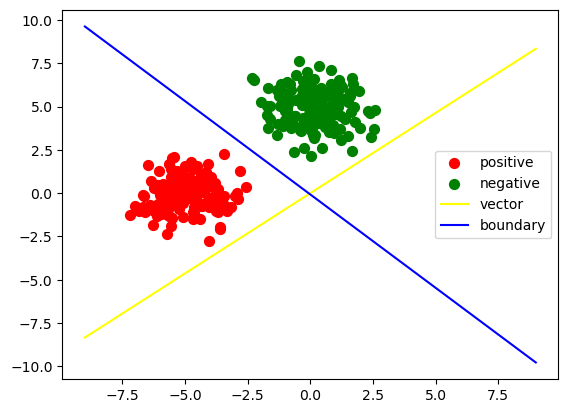

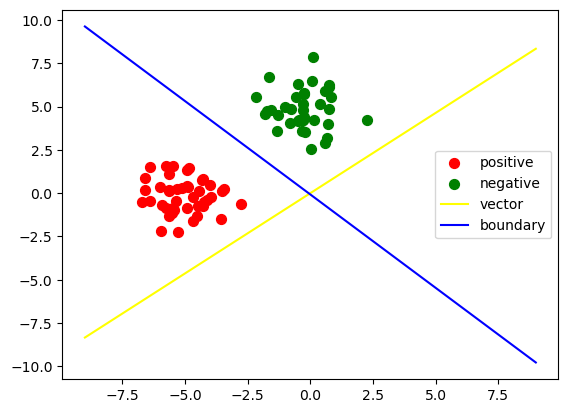

In [70]:
#按理来说，两条直线应该是垂直关系，也许是计算误差的原因，两条直线没有那么垂直
draw(train_set,w,threshold)
draw(test_set,w,threshold)

In [6]:
import numpy as np
X=np.array([[1,1,1,1],[1,2,2,1],[1,2,0,1],[1,0,0,-1],[1,1,0,-1],[1,0,1,-1]],float)
w=np.array([0.0,0.0,0.0])
lr=0.5
step=0
while True:
    error=False
    for i in range(6):
        step+=1
        is_false=(1-X[i,-1]*np.dot(w,X[i,0:-1]))>0.0
        if bool(is_false)==True:
            error=True
            grad=-X[i,-1]*X[i,0:-1]
            w=w-lr*grad
    if error==False:
        break
step-=6
print(w,step)
for i in range(6):
    print(1-X[i,-1]*np.dot(w,X[i,0:-1]))

[-3.  2.  2.] 60
0.0
-4.0
0.0
-2.0
0.0
0.0
